SyntaxError: ignored

## Day 5: Introduction to CNN 
Resources:
1. Introduction to CNN- 
https://towardsdatascience.com/introduction-to-convolutional-neural-networks-cnn-with-tensorflow-57e2f4837e18

2. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

3. https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

4. https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/

Task: To classify dogs and cats.

Note: If you encounter overfitting, please use dropouts and data augmentation.

Dataset:
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


In [1]:
from keras.utils.data_utils import get_file
path = get_file('/content/cats_and_dogs_filtered.zip', 
                'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip')


Using TensorFlow backend.


68608000/68606236 [==============================] - 1s 0us/step


In [2]:
!unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

In [0]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [0]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/cats_and_dogs_filtered/train/'
validation_data_dir = '/content/cats_and_dogs_filtered/validation/'

In [9]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')
validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(150, 150,...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.


In [7]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
nb_epoch = 30
nb_train_samples = 2048
nb_validation_samples = 832

In [16]:

model.fit(
        train_generator,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
    )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/30
125/125 [==============================] - 72s 573ms/step - loss: 0.6056 - acc: 0.6820 - val_loss: 0.6176 - val_acc: 0.6300
Epoch 2/30
125/125 [==============================] - 72s 577ms/step - loss: 0.5667 - acc: 0.7120 - val_loss: 0.5835 - val_acc: 0.7040
Epoch 3/30
125/125 [==============================] - 72s 577ms/step - loss: 0.5571 - acc: 0.7430 - val_loss: 0.5693 - val_acc: 0.6980
Epoch 4/30
125/125 [==============================] - 72s 578ms/step - loss: 0.5034 - acc: 0.7425 - val_loss: 0.5943 - val_acc: 0.7250
Epoch 5/30
125/125 [==============================] - 72s 575ms/step - loss: 0.4736 - acc: 0.7755 - val_loss: 0.5856 - val_acc: 0.7140
Epoch 6/30
125/125 [==============================] - 71s 570ms/step - loss: 0.4069 - acc: 0.8105 - val_loss: 0.6390 - val_acc: 0.7140
Epoch 7/30
125/125 [==============================] - 72s 573ms/step - loss: 0.4112 - acc: 0.8240 - val_loss: 0.5742 - val_acc: 0.7430
Epoch 8/30
125/125 [==============================] - 7

In [0]:
X_train, y_train = train_generator.next()
X_test, y_test = validation_generator.next()

In [0]:
model.save_weights('basic_cnn_30_epochs.h5')

In [36]:
model

In [35]:
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)

32/32 [==============================] - 0s 8ms/step
test loss, test acc: [2.592731237411499, 0.6875]


In [0]:
model.evaluate_generator(validation_generator, nb_validation_samples)

In [0]:
train_datagen_augmented = ImageDataGenerator(
        rescale=1./255,        # normalize pixel values to [0,1]
        shear_range=0.2,       # randomly applies shearing transformation
        zoom_range=0.2,        # randomly applies shearing transformation
        horizontal_flip=True)  # randomly flip the images

# same code as before
train_generator_augmented = train_datagen_augmented.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

In [0]:
model.fit(
        train_generator_augmented,
        # samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        # nb_val_samples=nb_validation_samples
        )

In [0]:
model.save_weights('models/augmented_30_epochs.h5')

In [0]:
#model.load_weights('models_trained/augmented_30_epochs.h5')

In [28]:
model.evaluate_generator(validation_generator, nb_validation_samples)

KeyboardInterrupt: ignored

Train on 9 samples, validate on 7 samples
Epoch 1/50
9/9 [==============================] - 0s 37ms/step - loss: 1.1494e-07 - acc: 1.0000 - val_loss: 2.0223e-07 - val_acc: 1.0000
Epoch 2/50
9/9 [==============================] - 0s 37ms/step - loss: 0.0562 - acc: 1.0000 - val_loss: 2.0242e-07 - val_acc: 1.0000
Epoch 3/50
9/9 [==============================] - 0s 36ms/step - loss: 1.1494e-07 - acc: 1.0000 - val_loss: 2.0242e-07 - val_acc: 1.0000
Epoch 4/50
9/9 [==============================] - 0s 37ms/step - loss: 1.1494e-07 - acc: 1.0000 - val_loss: 2.0242e-07 - val_acc: 1.0000
Epoch 5/50
9/9 [==============================] - 0s 37ms/step - loss: 1.1494e-07 - acc: 1.0000 - val_loss: 2.0242e-07 - val_acc: 1.0000
Epoch 6/50
9/9 [==============================] - 0s 36ms/step - loss: 1.7865e-05 - acc: 1.0000 - val_loss: 2.2405e-07 - val_acc: 1.0000
Epoch 7/50
9/9 [==============================] - 0s 37ms/step - loss: 1.9441e-07 - acc: 1.0000 - val_loss: 2.2836e-07 - val_acc: 1.0000
Epo

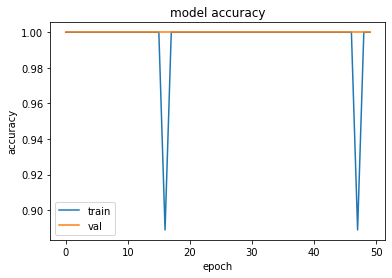

In [27]:
from matplotlib import pyplot as plt
history = model.fit(X_train, y_train,validation_split = 0.4, epochs=50, batch_size=30)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()